# 데이터 준비

In [1]:
import os

In [5]:
files = ["practice/8일차_실습_project/일반기사/"+_ for _ in os.listdir("practice/8일차_실습_project/일반기사/") if '-' in _]

In [7]:
D = []
Section = []
for file in files:
    with open(file, encoding="utf-8") as fp:
        D.append(fp.read())
    Section.append(file.split("/")[-1].split("-")[0])

# TDM

In [11]:
from konlpy.tag import Okt
from collections import defaultdict, Counter

In [19]:
ma = Okt()
TDM = defaultdict(list)
for d in D:
    for t in [_ for _ in ma.nouns(d) if len(_) > 1]:
        TDM[t].append(D.index(d))

In [20]:
V = Counter({t:len(freq) for t,freq in TDM.items()})

# PMI(감성분석)

In [238]:
positiveSeed = ["조국"]
negativeSeed = ["미국"]
PMI = defaultdict(lambda:{"P":0.0, "N":0.0})

N = len(D)
for x, docs in TDM.items():
    P_x = len(set(TDM[t]))/ N
    for seed in positiveSeed:
        P_seed = len(set(TDM[seed])) / N
        P_x_seed = len(set(TDM[x]) & set(TDM[seed])) / N
        PMI[x]["P"] += P_x_seed / (P_x * P_seed)
    for seed in negativeSeed:
        P_seed = len(set(TDM[seed])) / N
        P_x_seed = len(set(TDM[x]) & set(TDM[seed])) / N
        PMI[x]["N"] += P_x_seed / (P_x * P_seed)

In [239]:
sorted({x:PMI[x]["P"] for x in V}.items(), key=lambda x:x[1], reverse=True)[:20]

[('오류', 116.0),
 ('우회', 116.0),
 ('함수', 116.0),
 ('추가', 116.0),
 ('조국', 116.0),
 ('기자', 110.95652173913042),
 ('금지', 110.95652173913042),
 ('무단', 105.91304347826086),
 ('배포', 105.91304347826086),
 ('장관', 105.91304347826086),
 ('구독', 100.8695652173913),
 ('법무부', 100.8695652173913),
 ('관련', 90.78260869565217),
 ('네이버', 90.78260869565217),
 ('검찰', 90.78260869565217),
 ('한국', 85.7391304347826),
 ('대표', 85.7391304347826),
 ('국회', 85.7391304347826),
 ('라며', 80.69565217391303),
 ('대해', 80.69565217391303)]

In [240]:
sorted({x:PMI[x]["N"] for x in V}.items(), key=lambda x:x[1], reverse=True)[:20]

[('오류', 116.0),
 ('우회', 116.0),
 ('함수', 116.0),
 ('추가', 116.0),
 ('미국', 116.0),
 ('구독', 112.25806451612905),
 ('기자', 97.29032258064517),
 ('무단', 93.54838709677419),
 ('배포', 93.54838709677419),
 ('금지', 93.54838709677419),
 ('네이버', 89.80645161290323),
 ('뉴스', 71.09677419354838),
 ('지난', 67.35483870967742),
 ('이후', 63.61290322580645),
 ('대한', 59.87096774193549),
 ('상황', 56.12903225806453),
 ('가능성', 56.12903225806453),
 ('채널', 56.12903225806453),
 ('현재', 56.12903225806453),
 ('한국', 52.38709677419355)]

In [241]:
SO = dict()
for x in V:
    SO[x] = PMI[x]["P"] - PMI[x]["N"]

In [242]:
Q = D[0]
Sentiment = 0.0
for t in ma.nouns(Q):
    if t in V:
        Sentiment += SO[t]
        print(t, SO[t])
print()
print("Positive" if Sentiment > 0 else "Negative")
print(Sentiment)

오류 0.0
우회 0.0
함수 0.0
추가 0.0
대체 -3.741935483870968
얘기 40.347826086956516
애플리케이션 0.0
가속 -2.4403927068723714
보완재 0.0
로서 -14.967741935483872
고성능 -3.741935483870968
제공 -26.193548387096776
보완 5.0434782608695645
역할 2.7657784011220166
제공 -26.193548387096776
시장 -33.67741935483871
형성 -11.225806451612904
업체 -18.70967741935484
로서 -14.967741935483872
보드 -3.741935483870968
스위치 0.0
제조 -7.483870967741936
파트너 -3.741935483870968
계속 11.551192145862547
관계 8.948106591865354
한국 33.35203366058904
앨러스테어 0.0
리차드슨 -3.741935483870968
자일링스 0.0
테크 0.0
부문 -7.483870967741936
글로벌 -26.193548387096776
비즈니스 1.3015427769985966
개발 -18.70967741935484
담당 -7.483870967741936
최근 -4.5553997194950995
자일링스 0.0
행보 -1.1388499298737749
시장 -33.67741935483871
형성 -11.225806451612904
용어 5.0434782608695645
정리 -1.1388499298737749
인텔 0.0
프로그래밍 0.0
자일링스 0.0
지난해 -17.408134642356245
메이커 0.0
발짝 0.0
데이터 0.0
센터 1.3015427769985966
플랫폼 -3.741935483870968
생태계 0.0
집중 3.9046283309957897
모습 4.067321178120611
보이 -2.4403927068723714
앨러스테어 0.0
리차드슨 -3.74

# DTM

In [114]:
# DTM = [[0 for _ in range(len(V))] for _ in range(len(D))]
DTM = defaultdict(list)
V_ = list(V.keys())
for t,docs in TDM.items():
    for d in docs:
        DTM[d].append(t)

# LDA(토픽 분석)

In [54]:
from random import seed, randint

In [226]:
seed(11)

K = 6
N = len(D)
M = len(V_)

Phi = [[0 for _ in range(M)] for _ in range(K)] # 토픽에 대한 단어 분포
Theta = [[0 for _ in range(K)] for _ in range(N)] # 문서에 대한 토픽 분포
Z = [[randint(0,K-1) for _ in range(len(DTM[n]))] for n in range(N)] # DTM 모양
TopicSum = [0 for _ in range(K)]

for i in range(N):
    for j in range(len(Z[i])):
        k = Z[i][j]
        termIdx = V_.index(DTM[i][j])
        Phi[k][termIdx] += 1
        Theta[i][k] += 1
        TopicSum[k] += 1

In [227]:
from random import choices

def term_likelihood(k, b, t):
    return (Phi[k][t]+b) / (TopicSum[k]+b)

def document_likelihood(k, a, d):
    return Theta[d][k] + a

def gibbs_sampling(a, b, t, d):
    candidates = []
    for _ in range(K):
        candidates.append(term_likelihood(k, b, t) * document_likelihood(k, a ,d))
    return choices(range(K), candidates)[0]

In [228]:
from progressbar import ProgressBar
pb = ProgressBar()
a = 0.1
b = 0.1

for _ in pb(range(50)):
    for n in range(N):
        for i, t in enumerate(DTM[n]):
            termIdx = V_.index(t)
            oldTopic = Z[n][i]
            Phi[oldTopic][termIdx] -= 1
            Theta[n][oldTopic] -= 1
            TopicSum[oldTopic] -= 1

            newTopic = gibbs_sampling(a, b, termIdx, n)

            Z[n][i] = newTopic
            Phi[newTopic][termIdx] += 1
            Theta[n][newTopic] += 1
            TopicSum[newTopic] += 1

100% |########################################################################|


In [229]:
topic_count = [0 for _ in range(K)]
for _ in range(len(D)):
    topic_count[Theta[_].index(max(Theta[_]))] += 1
topic_count

[18, 28, 15, 21, 19, 15]

# VIsualization

In [147]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

In [173]:
[(_.name, _.fname) for _ in fm.fontManager.ttflist if _.name.startswith("NanumBarun")]

[('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicBold.ttf'),
 ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothicUltraLight.ttf'),
 ('NanumBarunpen', 'C:\\Windows\\Fonts\\NanumBarunpenR.ttf'),
 ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'),
 ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothicLight.ttf'),
 ('NanumBarunpen', 'C:\\WINDOWS\\Fonts\\NanumBarunpenB.ttf')]

In [170]:
fm.rcParams["font.family"] = "NanumBarunpen"

In [164]:
wordcloud = WordCloud(font_path=r"C:\\WINDOWS\\Fonts\\NanumBarunpenB.ttf",
                     background_color="white")

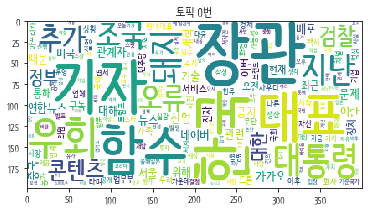

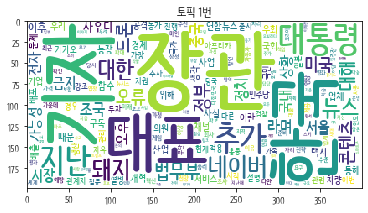

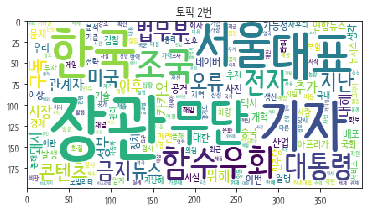

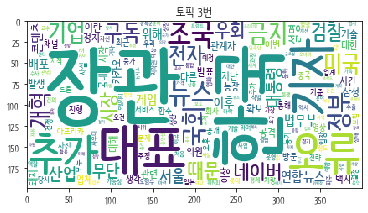

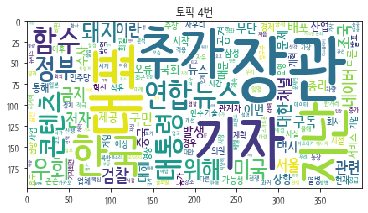

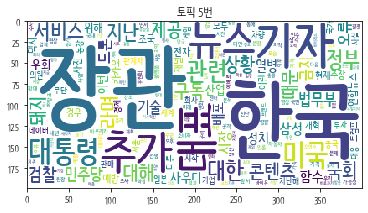

In [230]:
for k in range(K):
    wc = wordcloud.generate_from_frequencies({t:freq for t,freq in zip(V_, Phi[k])})
    plt.title(f"토픽 {k}번")
    plt.imshow(wc)
    plt.show()

> 전처리를 안 했고, LDA 반복 횟수가 충분히 많지 않았기 때문에 

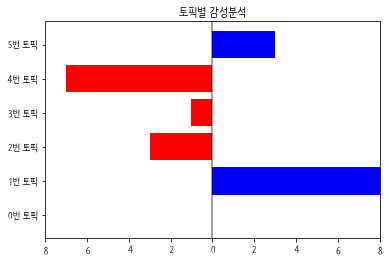

In [256]:
X = [0 for _ in range(K)]
Y = range(K)
temp = defaultdict(int)
for d in range(len(D)):
    topic = Theta[d].index(max(Theta[d]))
    Sentiment = 0
    for t in DTM[d]:
        Sentiment += SO[t]
    doc_Sentiment = 1 if Sentiment > 0 else -1
    temp[doc_Sentiment] += 1
    X[topic] += doc_Sentiment

plt.title("토픽별 감성분석")
plt.xlim(-max([abs(_) for _ in X]), max([abs(_) for _ in X]))
plt.yticks(ticks=range(K), labels=[f"{_}번 토픽" for _ in range(K)])
plt.axvline(color="k", alpha = 0.5)
plt.barh(Y, X, color="r")
plt.barh(Y, [_ if _ > 0 else 0 for _ in X], color="b")
plt.show()

In [257]:
temp

defaultdict(int, {-1: 58, 1: 58})

> 감성분석이 이렇게 반반이 나올 수 없다...  
seed 단어를 제대로 못 골랐기 때문에 이렇게 나왔을 것이다. 